In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
advertising=pd.read_csv("D:/upgrad/advertising.csv")

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


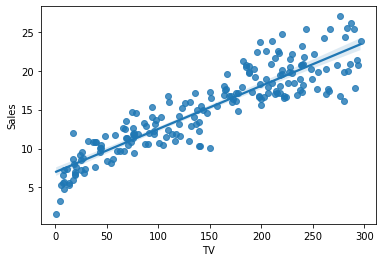

In [9]:
sns.regplot(x='TV',y='Sales',data=advertising)

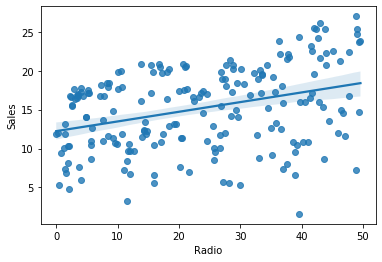

In [10]:
sns.regplot(x="Radio",y="Sales",data=advertising)

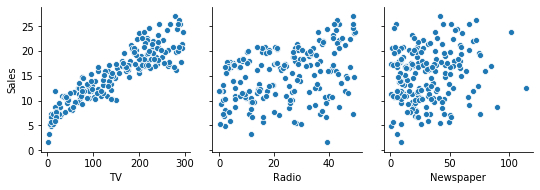

In [12]:
# combine we use the pair plot

sns.pairplot(x_vars=['TV','Radio','Newspaper'],
            y_vars=['Sales'],data=advertising)

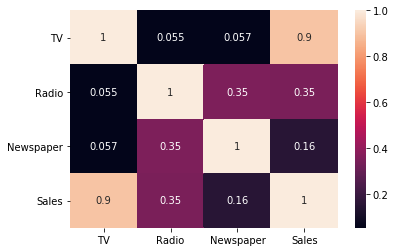

In [13]:
sns.heatmap(advertising.corr(), annot=True)

In [18]:
# ctreate x and y

X=advertising['TV']
y=advertising['Sales']

In [19]:
# train test split

from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [21]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [23]:
# training the model
# using Statsmodel

x_train_sm = sm.add_constant(x_train)

x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
# fitting the model
lr=sm.OLS(y_train,x_train_sm)

In [26]:
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           1.52e-52
Time:                        11:57:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y_train_pred=lr_model.predict(x_train_sm)

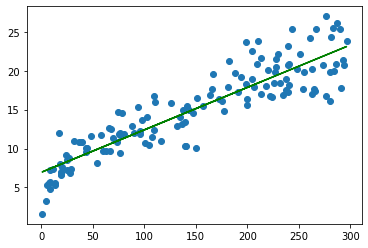

In [70]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_train_pred,'g')

### Residual Analysis

In [59]:
res=y_train-y_train.pred

Text(0.5, 1.0, 'residual plot')

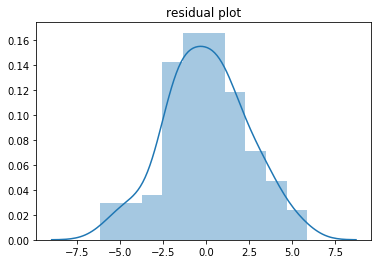

In [60]:
plt.figure()
sns.distplot(res)
plt.title('residual plot')

In [61]:
# look for pattern
# plt.scatter(x_train,res)

### Pridiction and Evaluation on Test Data

In [62]:
# add const
x_test_sm=sm.add_constant(x_test)


# prediction on the test set
y_test_pred=lr_model.predict(x_test_sm)

In [63]:
# evaluate the model using r-square
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [65]:
# on train set

r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389

In [66]:
# can also compute mean square error
mean_squared_error(y_true=y_train,y_pred=y_train_pred)

5.752400386486836

In [67]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

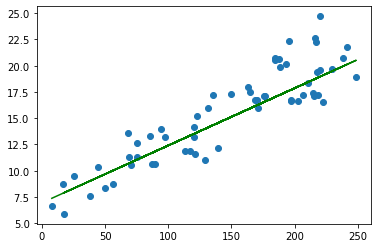

In [69]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_test_pred,'g')

## Linear Regression using SKlearn

In [97]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [98]:
# steps in sklearn in building model
# 1- create an object of linear regression or any other
# 2- fil the model
# 3-see the parameters,make predictions(train,test)
# 4-Evaluate the model using r-square or any other wich ever is suitable

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
# reshape the x_train
x_train_lm = x_train.values.reshape((-1,1))
x_test_lm = x_test.values.reshape((-1,1))

In [101]:
lm=LinearRegression()
lm.fit(x_train_lm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [104]:
# make prediction

y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)

In [106]:
# evaluate the model
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
